# Irony Detection in English 

#### The goal of this project consists in training a model capable of performing the task of classificating a tweet in English as ironic or non ironic.

Using different classification techniques we intend to find the one that performs better using as training data a data set with around 4000 tweets of different types.

This project was made by 3 students as part of the Artificial Intelligence course at FEUP. You are free to use the code for any purpose, but beware that this is just an academia project in an introductory course to Artificial Intelligence.

Libraries Used: 
* Pandas
* Numpy
* Scikit-learn
* Matplotlib
* nltk

### Datasets:

The data sets for this project are not owned by our group, they are supplied by SemEval competition and are free to use for academic purposes only outside of the competition.

There are two data sets available, one marked for train and the other for testing. Originally they were in .txt format, but in order to simplify the work of the pandas library, we manually converted those files to .csv

**SemEval organization themselves already provide a division of the dataset in two subsets, a test dataset and a train dataset.**

This division is useful for the final evaluation of our work. Since the competition was in 2018, the ranking of the participants for that dataset is already public. This way we are able to keep track of which place we could score in that professional competition



![title](../assets/ranking.png)
##### Fig1: Ranking of the SemEval competition

#### Problem with word delimeter

Pandas is a library perfect for the job of reading data from a file, since it setup automaticaly the capability of seeing that data in a formatted organized way.

Pandas has specific functions to read from different formats. The datasets are originally in .txt format, a conversion for either JSON or CSV, formats accepted by Pandas needed to be done. 4000 tweets in JSON would turn the data file really dense in information.
Since we are dealing with just 2 attributes, it is pointless to make our life harder in this step. 

We chosed .csv format to represent the data

CSV files dealing with text rise other problem, the fact that people use comma in their texts, pandas. So we introduce other delimiter,'\t', so we are able to do the task

In [65]:
from IPython.display import display, HTML
import pandas
import numpy

train_data=pandas.read_csv('data/train.csv',  delimiter = '\t', quoting = 3, encoding="utf-8")
test_data=pandas.read_csv('data/test-labeled.csv', delimiter = '\t', quoting = 3, encoding="utf-8")

In [66]:
train_data.head()

,label,tweet
0,1,Sweet United Nations video. Just in time for C...
1,1,@mrdahl87 We are rumored to have talked to Erv...
2,1,Hey there! Nice to see you Minnesota/ND Winter...
3,0,3 episodes left I'm dying over here
4,1,"""I can't breathe!"" was chosen as the most nota..."


In [67]:
test_data.head()

,label,tweet
0,0,@Callisto1947 Can U Help?||More conservatives ...
1,1,"Just walked in to #Starbucks and asked for a ""..."
2,0,#NOT GONNA WIN http://t.co/Mc9ebqjAqj
3,0,@mickymantell He is exactly that sort of perso...
4,1,So much #sarcasm at work mate 10/10 #boring 10...


### Analising the datasets

Some initial considerations should be done in order to ensure the quality of the data. The data provided doesn't contain blank fields. 

Testing proprelly the existance of duplicates in the datasets would require knowledge outside the scope of the course, so we assume that there aren't duplicate data in the dataset.


**One very important consideration regarding the data is the possibility of the dataset being unbalanced** With both of our data sets loaded, we can use **Matplotlib** to determine if that consideration holds.

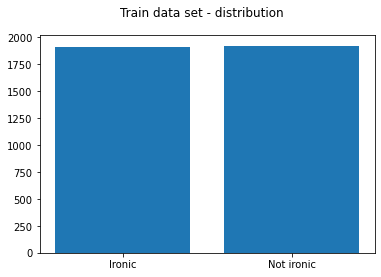

Ironic tweets -  1911
Non Ironic tweets -  1923
Percentage of ironic tweets -  49.84350547730829


In [68]:
import matplotlib.pyplot as plt
%matplotlib inline
train_data_ntrue=train_data['label'].sum()
train_data_nfalse=train_data['label'].count()-train_data_ntrue
values=[train_data_ntrue,train_data_nfalse]
names=['Ironic','Not ironic']
plt.bar(names,values)
plt.suptitle('Train data set - distribution')
plt.show()
print('Ironic tweets - ',train_data_ntrue)
print('Non Ironic tweets - ',train_data_nfalse)
print('Percentage of ironic tweets - ',train_data_ntrue*1.0/train_data['label'].count()*100.0)

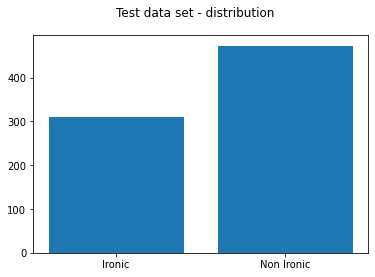

Ironic tweets -  311
Non Ironic tweets -  473
Percentage of ironic tweets -  39.66836734693878


In [69]:
test_data_ntrue=test_data['label'].sum()
test_data_nfalse=test_data['label'].count()-test_data_ntrue
values=[test_data_ntrue,test_data_nfalse]
names=['Ironic','Non Ironic']
plt.suptitle('Test data set - distribution')
plt.bar(names,values)
plt.show()
print('Ironic tweets - ',test_data_ntrue)
print('Non Ironic tweets - ',test_data_nfalse)
print('Percentage of ironic tweets - ',test_data_ntrue*1.0/test_data['label'].count()*100.0)

#### Conclusion:

While the training data is **balanced** in the number of ironic and non ironic tweets, the same can't be said for the test data set originnaly provided by the organization.

In our second graph, its visually palpable that the number of non ironic tweets is significantly larger.

### Bag of words

Now that we have the data in a pandas data set we need to proceed our path of finding an accurate model to identify ironic tweets. For that we need to parse our tweets to a **bag of words** model format.

A bag of words is a model which tweet will see their words tokenized and counted by a specified formula. Where we have 2 essential paths that we can follow:

* Use a simple counting of words.
* Use the TF-IDF measure

##### The process of getting as input the raw text and output a bag of words is called **Vectorization**

## Initial analysis


There are two important questions that we need to be able to answer in order to proceed in our model design and also a raw analysis without pre processing, this way we can estimate the level of pre processing we need in order to achieve a reasonable answer and also keep track of degree of improvement we have in each attempt we try.

* Does TF-IDF measure perform better that a simple counting of words?
* How good performs the simplest model in our dataset without preprocessing?

In order to have a objective evaluation criteria to our final answer to this problem, it is important to make a fast initial analysis to the data without any kind of pre processing to the data, using the simplest model possible, a **Gaussian naïve Bayes**.

### Simple Word Counter Vetorization

#### Train Data

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

count_vectorizer = CountVectorizer(analyzer='word', stop_words='english', lowercase=False)

X_train=count_vectorizer.fit_transform(train_data['tweet']).toarray()
y_train=train_data['label']

#### Test Data

In [71]:
# Here we just Transform. Because the vocabulary is the one from the test set
X_test=count_vectorizer.transform(test_data['tweet']).toarray()
y_test=test_data['label']

#### Model execution

In [72]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

classificator=GaussianNB()

classificator.fit(X_train,y_train)
#Predicition
y_predicted=classificator.predict(X_test)



#Metrics Raw
accuracy_value=accuracy_score(y_test,y_predicted)
precision_value=precision_score(y_test,y_predicted,average='weighted')
f1_value=f1_score(y_test,y_predicted,average='weighted')


initial_word_count_conclusion=pandas.DataFrame(
    {
    'Our Results':[accuracy_value,precision_value,f1_value],
    'Winners Result':[0.7347,0.6304,0.8006]
    } , index=['Accuracy','Precision','F1-Value'])

### TF-IDF Vetorization

#### Train Data

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer(analyzer='word', stop_words='english', lowercase=False)

X_train=tf_idf_vectorizer.fit_transform(train_data['tweet']).toarray()
y_train=train_data['label']

#### Test Data

In [74]:
X_test=tf_idf_vectorizer.transform(test_data['tweet']).toarray()
y_test=test_data['label']

#### Model execution

In [75]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

classificator=GaussianNB()

classificator.fit(X_train,y_train)
#Predicition
y_predicted=classificator.predict(X_test)



#Metrics Raw
accuracy_value=accuracy_score(y_test,y_predicted)
precision_value=precision_score(y_test,y_predicted,average='weighted')
f1_value=f1_score(y_test,y_predicted,average='weighted')


initial_tf_idf_conclusion=pandas.DataFrame(
    {
    'Our Results':[accuracy_value,precision_value,f1_value],
    'Winners Result':[0.7347,0.6304,0.8006]
    } , index=['Accuracy','Precision','F1-Value'])

### Initial Analysis conclusion:

**The differences between the competition results and our naive model are relevant. Preprocessing of data is required to improve this values. Other models techniques should also be used.** 


Other element relevant is that using simple word counting or TF-IDF doesn't produce any kind of relevant difference in the results achieved. For that reason **TF-IDF will hold**


#### Simple Word Counting

In [76]:
initial_word_count_conclusion

,Our Results,Winners Result
Accuracy,0.510204,0.7347
Precision,0.556403,0.6304
F1-Value,0.509943,0.8006


#### TF-IDF

In [77]:
initial_tf_idf_conclusion

,Our Results,Winners Result
Accuracy,0.514031,0.7347
Precision,0.550978,0.6304
F1-Value,0.516916,0.8006


## Data Preprocessing

# TODO -> Remove non english words? / Tokenize emojis / Lemmatization 

## Data pre processing process

The downfall of the initial results can be easily explained by multiple reasons:

* We are dealing social network data. That data contains lots of useless information like links, mentions or emojis and also lots of slangs and non standard vocabulary

* Didn't apply any type of Stemming or Lemmatization

* Used a simple Gaussian naïve Bayes rather than a complex neural network.

* Used the embedded tokenizer of sci kit learn rather than dedicated ones.

* The initial vocabulary is very large. 14k words. This decreases perfomance and increases overfitting to the train data.

* A final problem that could be related with the poor perfomance of the initial model is the traditional downfalls of NLP algorithms in finding contraditions. Irony many times has contradictions implied.



#### Remove Web Hyperlinks from tweets

In [170]:
train_data['tweet']=train_data['tweet'].str.replace('http\S+|www.\S+', '', case=False)

#### Normalization of Twitter mentions

In twitter is mandatory to mention the person that we reply with their personal nickname. In this Social Network this mentions are done using "@" followed by a single word that identifies the nickname

In [171]:
train_data['tweet']=train_data['tweet'].str.replace('@\S+', '', case=False)

#### Remove Numbers from the tweets

Numbers don't introduce power to a language of ironic tweets.

In [172]:
train_data['tweet']=train_data['tweet'].str.replace('d+', '', case=False)

#### Remove Hashtags

In [173]:
train_data['tweet']=train_data['tweet'].str.replace('#[\w]+', '', case=False)

### Contradictions

In [174]:
import contractions

contradictions_fixed=[]

for i in range(len(train_data)):
    contradictions_fixed.append(contractions.fix(train_data['tweet'][i]))

### Lemmatization

In [175]:
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()

lemmatization_result = []

for i in range(len(contradictions_fixed)):
    tweet = lemmatizer.lemmatize(contradictions_fixed[i])
    lemmatization_result.append(tweet)


### Tokenization and Stemming with normalization of uppercase words.

Goal is to reduce the vocabulary to the absolutely necessary

In [176]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

ps = PorterStemmer()
corpus = []

for i in range(len(lemmatization_result)):
    # get review and remove non alpha chars
    tweet = re.sub('[^a-zA-Z]', ' ', lemmatization_result[i])
    # to lower-case and tokenize
    tweet = tweet.lower().split()
    # stemming and stop word removal
    tweet = ' '.join([ps.stem(w) for w in tweet if not w in set(stopwords.words('english'))])
    corpus.append(tweet)

vectorizer = TfidfVectorizer(max_features = 800)

X_train=vectorizer.fit_transform(corpus).toarray()
y_train=train_data['label'].copy()

print(corpus)

['sweet unit nation vieo time christma', 'rumor talk erv agent angel ask e escobar harli noth', 'hey nice see minnesota n winter weather', 'episo left ying', 'breath chosen notabl quot year annual list releas yale univers librarian', 'never old footi pajama', 'noth make happier get highway see break light light like christma tree', 'open first beer go long night ay', 'think woul support guy knock aughter rice oe eserv support', 'allow open christma ay', 'oh thank go entir offic email system ay big event santa know get xma', 'instea scroll facebook instagram twitter hour en accomplish noth', 'blooy upstair get chang', 'col warmth suffus one cheek pink colour tone unerstan unerli iffer textur', 'great mobil bill arriv text', 'crush great realiz never interest p', 'buffalo sport meia smarter us els get qualiti insight offer harrington busgaglia', 'guess cat also lost poun went vet fee time ay', 'tra sp efens ss brilliant trae', 'tri fin us batteri ie guess foun us ye bastar wan', 'pleas n

In [177]:
print(len(vectorizer.vocabulary_))

800


In [178]:
14042

14042

* Fazer aquela cena dos vetores de similitude vai curtir -> Encontrar duplicados
* Remover Numeros

In [179]:
classifier=GaussianNB()

classifier.fit(X_train,y_train)

X_test=vectorizer.transform(test_data['tweet']).toarray()
y_test=test_data['label']

y_predicted=classifier.predict(X_test)

print(classification_report(y_test,y_predicted))
print(confusion_matrix(y_test, y_predicted))

accuracy_value=accuracy_score(y_test,y_predicted)
precision_value=precision_score(y_test,y_predicted,average='weighted')
f1_value=f1_score(y_test,y_predicted,average='weighted')

actual_conclusion=pandas.DataFrame(
    {
    'Our Results':[accuracy_value,precision_value,f1_value],
    'Winners Result':[0.7347,0.6304,0.8006]
    } , index=['Accuracy','Precision','F1-Value'])

actual_conclusion.head()

              precision    recall  f1-score   support

           0       0.67      0.82      0.74       473
           1       0.59      0.38      0.46       311

    accuracy                           0.65       784
   macro avg       0.63      0.60      0.60       784
weighted avg       0.64      0.65      0.63       784

[[390  83]
 [193 118]]


,Our Results,Winners Result
Accuracy,0.647959,0.7347
Precision,0.636470,0.6304
F1-Value,0.628478,0.8006


In [ ]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_predicted = classifier.predict(X_test)

print(classification_report(y_test,y_predicted))
print(confusion_matrix(y_test, y_predicted))

In [180]:
# Neural Network
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

scaler = StandardScaler()
classificator = MLPClassifier()

scaler.fit(X_train)

X_test=vectorizer.transform(test_data['tweet']).toarray()


X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

y_test=test_data['label']


classificator.fit(X_train, y_train)
y_predicted = classificator.predict(X_test)

print(classification_report(y_test,y_predicted))
print(confusion_matrix(y_test, y_predicted))


accuracy_value=accuracy_score(y_test,y_predicted)
precision_value=precision_score(y_test,y_predicted,average='weighted')
f1_value=f1_score(y_test,y_predicted,average='weighted')

actual_conclusion=pandas.DataFrame(
    {
    'Our Results':[accuracy_value,precision_value,f1_value],
    'Winners Result':[0.7347,0.6304,0.8006]
    } , index=['Accuracy','Precision','F1-Value'])

actual_conclusion.head()

              precision    recall  f1-score   support

           0       0.70      0.76      0.73       473
           1       0.58      0.51      0.54       311

    accuracy                           0.66       784
   macro avg       0.64      0.63      0.64       784
weighted avg       0.65      0.66      0.66       784

[[360 113]
 [153 158]]


,Our Results,Winners Result
Accuracy,0.660714,0.7347
Precision,0.654657,0.6304
F1-Value,0.655937,0.8006


In [ ]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
y_predicted = classifier.predict(X_test)

print(classification_report(y_test,y_predicted))
print(confusion_matrix(y_test, y_predicted))

In [ ]:
# SVM

from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)
y_predicted=classifier.predict(X_test)

print(classification_report(y_test,y_predicted))
print(confusion_matrix(y_test, y_predicted))

In [ ]:
X_test=vectorizer.transform(test_data['tweet']).toarray()
y_test=test_data['label']

classificator.fit(X_train,y_train)
#Predicition
y_predicted=classificator.predict(X_test)

print(classification_report(y_test,y_predicted))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_predicted))

accuracy_value=accuracy_score(y_test,y_predicted)
precision_value=precision_score(y_test,y_predicted,average='weighted')
f1_value=f1_score(y_test,y_predicted,average='weighted')

actual_conclusion=pandas.DataFrame(
    {
    'Our Results':[accuracy_value,precision_value,f1_value],
    'Winners Result':[0.7347,0.6304,0.8006]
    } , index=['Accuracy','Precision','F1-Value'])

In [ ]:
actual_conclusion